In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import pandas as pd
import numpy as np
import IPython.display as ipd


In [2]:
# audio 1 
audio_1_path = "audio1.wav"
ipd.Audio(audio_1_path)

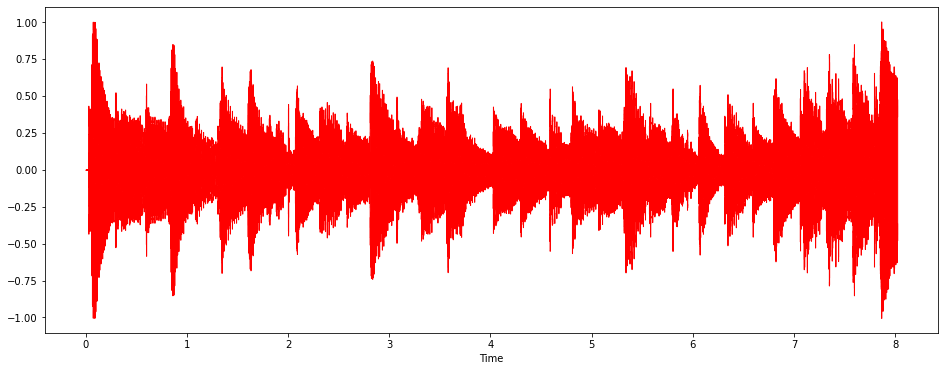

In [3]:
data, sample_rate = librosa.load(audio_1_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [4]:
# recorded audio 
audio_record_path = "record.wav"
ipd.Audio(audio_record_path)

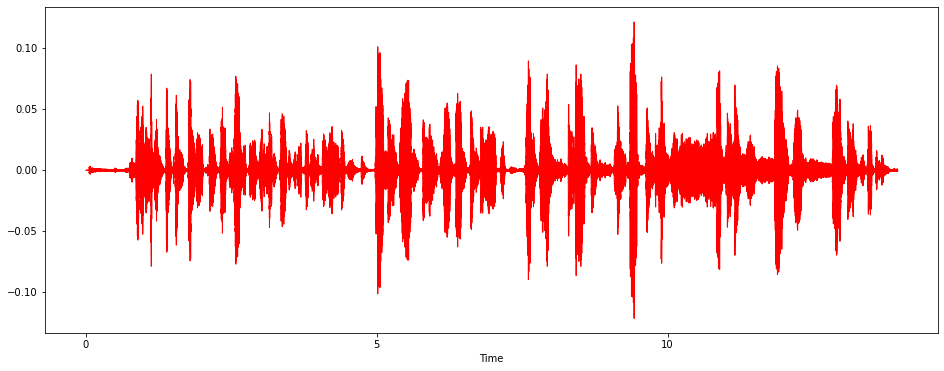

In [5]:
data, sample_rate = librosa.load(audio_record_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(data, sr=sample_rate, color='red')

In [9]:
# mixing file 
import pydub
sound1 = AudioSegment.from_file("audio1.wav")
sound2 = AudioSegment.from_file("record.wav")

combined = sound1.overlay(sound2)

combined.export("mixing_audio.wav", format='wav')

C:\Users\H\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


NameError: name 'AudioSegment' is not defined

In [83]:
# mixing audio
mixing_audio_path = "mixing_audio.wav"
ipd.Audio(mixing_audio_path)

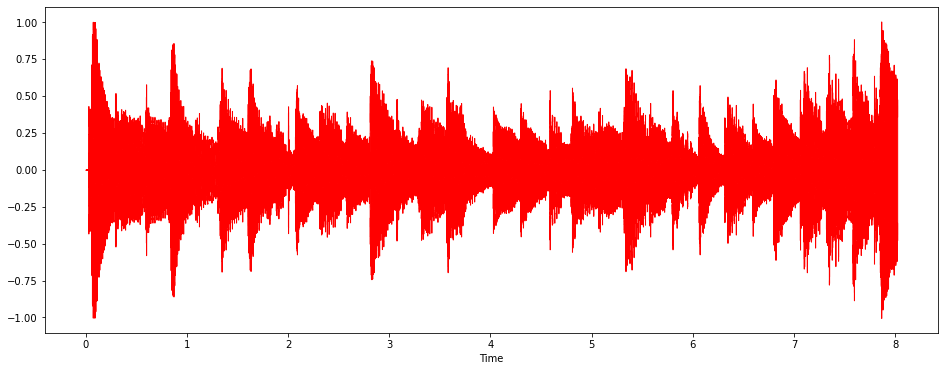

In [84]:
mixing_data, sample_rate = librosa.load(mixing_audio_path)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(mixing_data, sr=sample_rate, color='red')

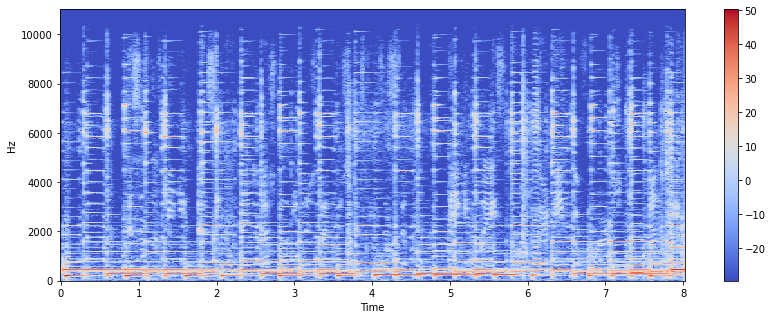

In [85]:
X = librosa.stft(mixing_data)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

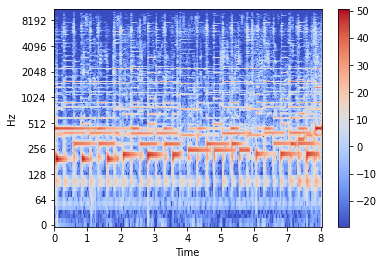

In [86]:
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [47]:
import noisereduce as nr
audio_data, sampling_rate = librosa.load(filepath)
noisy_part = audio_data[8000:10000]
reduced_noise = nr.reduce_noise(y=audio_data, y_noise=noisy_part, sr=sample_rate)
# reduced_noise = nr.reduce_noise(audio_clip=audio_data, noise_clip=noisy_part, verbose=True)

C:\Users\H\AppData\Local\Temp\ipykernel_5328\2504059850.py:4: DeprecationWarning: `magic(...)` is deprecated since IPython 0.13 (warning added in 8.1), use run_line_magic(magic_name, parameter_s).
  get_ipython().magic('matplotlib inline')


Text(0, 0.5, 'Amplitude')

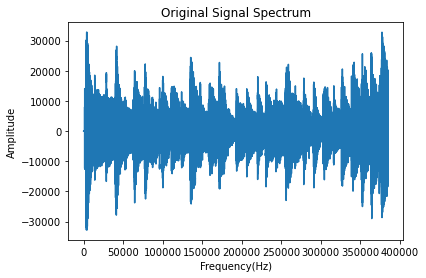

In [48]:
from scipy.io.wavfile import read  
from scipy.io.wavfile import write     
from scipy import signal  
get_ipython().magic('matplotlib inline')  

(Frequency, array) = read('mixing_audio.wav')  

len(array)  

plt.plot(array)   
plt.title('Original Signal Spectrum')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  



In [52]:
# # plot -s 1000,600

# #  Read the audio signal with its sampling frequency in Hz
# [audio_signal,sampling_frequency] = audioread('mixing_audio.wav');

# #  Estimate the background signal, and the foreground signal
# background_signal = repet.original(audio_signal,sampling_frequency);
# foreground_signal = audio_signal-background_signal;

In [49]:
FourierTransformation = sp.fft(array)  

scale = sp.linspace(0, Frequency, len(array))  

plt.stem(scale[0:5000], np.abs(FourierTransformation[0:5000]), 'r')    
plt.title('Signal spectrum after FFT')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  


GuassianNoise = np.random.rand(len(FourierTransformation))  


NewSound = GuassianNoise + array  

write("New-Sound-Added-With-Guassian-Noise.wav", Frequency, NewSound)  

b,a = signal.butter(5, 1000/(Frequency/2), btype='highpass')  

filteredSignal = signal.lfilter(b,a,NewSound)  
plt.plot(filteredSignal) # plotting the signal.  
plt.title('Highpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  


c,d = signal.butter(5, 380/(Frequency/2), btype='lowpass') # ButterWorth low-filter  
newFilteredSignal = signal.lfilter(c,d,filteredSignal) # Applying the filter to the signal  
plt.plot(newFilteredSignal) # plotting the signal.  
plt.title('Lowpass Filter')  
plt.xlabel('Frequency(Hz)')  
plt.ylabel('Amplitude')  

write("New-Filtered-Sound.wav", Frequency, newFilteredSignal)

NameError: name 'sp' is not defined